In [43]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('hotels.csv')
df.head()

,id,name,host-id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,1,Luxury Hotel Downtown,10001,Hotel ABC,Downtown,Downtown,40.7128,-74.0060,Entire hotel,300,1,200,5/25/2023,2.5,5,250,150,ABC123
1,2,Beachside Resort,10002,Resort XYZ,Beachside,Beachside,34.0522,-118.2437,Entire resort,500,2,150,11/30/2022,1.8,10,180,120,XYZ456
2,3,Boutique Hotel Old Town,10003,Hotel DEF,olf town,Old Town,51.5074,-0.1278,Entire hotel,200,1,300,1/15/2023,3.2,3,300,200,DEF789
3,4,Riverside Inn,10004,Inn GHI,Riverside,Riverside,39.9526,-75.1652,Entire inn,150,1,100,9/20/2022,1.5,6,120,80,GHI101
4,5,Mountain Lodge Retreat,10005,Lodge JKL,Mountains,Mountains,47.6062,-122.3321,Entire lodge,250,2,120,12/10/2022,2.0,4,200,100,JKL202


In [45]:
df.drop(columns=['neighbourhood_group'],inplace=True)

In [46]:
selected_columns = ['host-id','neighbourhood','latitude','longitude','room_type','price','minimum_nights','reviews_per_month','number_of_reviews','calculated_host_listings_count','availability_365','number_of_reviews_ltm']
df = df[selected_columns]

In [47]:
df.head()

,host-id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_per_month,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,10001,Downtown,40.7128,-74.0060,Entire hotel,300,1,2.5,200,5,250,150
1,10002,Beachside,34.0522,-118.2437,Entire resort,500,2,1.8,150,10,180,120
2,10003,Old Town,51.5074,-0.1278,Entire hotel,200,1,3.2,300,3,300,200
3,10004,Riverside,39.9526,-75.1652,Entire inn,150,1,1.5,100,6,120,80
4,10005,Mountains,47.6062,-122.3321,Entire lodge,250,2,2.0,120,4,200,100


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host-id                         5 non-null      int64  
 1   neighbourhood                   5 non-null      object 
 2   latitude                        5 non-null      float64
 3   longitude                       5 non-null      float64
 4   room_type                       5 non-null      object 
 5   price                           5 non-null      int64  
 6   minimum_nights                  5 non-null      int64  
 7   reviews_per_month               5 non-null      float64
 8   number_of_reviews               5 non-null      int64  
 9   calculated_host_listings_count  5 non-null      int64  
 10  availability_365                5 non-null      int64  
 11  number_of_reviews_ltm           5 non-null      int64  
dtypes: float64(3), int64(7), object(2)
memor

In [49]:
df.describe()

,host-id,latitude,longitude,price,minimum_nights,reviews_per_month,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,10003.000000,42.766240,-77.974960,280.000000,1.400000,2.200000,174.000000,5.600000,210.000000,130.000000
std,1.581139,6.853845,49.175591,135.092561,0.547723,0.667083,79.874902,2.701851,68.556546,46.904158
min,10001.000000,34.052200,-122.332100,150.000000,1.000000,1.500000,100.000000,3.000000,120.000000,80.000000
25%,10002.000000,39.952600,-118.243700,200.000000,1.000000,1.800000,120.000000,4.000000,180.000000,100.000000
50%,10003.000000,40.712800,-75.165200,250.000000,1.000000,2.000000,150.000000,5.000000,200.000000,120.000000
75%,10004.000000,47.606200,-74.006000,300.000000,2.000000,2.500000,200.000000,6.000000,250.000000,150.000000
max,10005.000000,51.507400,-0.127800,500.000000,2.000000,3.200000,300.000000,10.000000,300.000000,200.000000


In [50]:
df.isnull().sum()

host-id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
reviews_per_month                 0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [51]:
# fill null values in columns if its sum is greater than 750 and drop others 
from sklearn.impute import SimpleImputer
columns_to_fill = ['reviews_per_month']
if df[columns_to_fill].isnull().sum().sum() > 750:
    imputer = SimpleImputer(strategy='mean')
    
    df[columns_to_fill] = imputer.fit_transform(df[columns_to_fill])
    
    df.dropna(inplace=True)
else:
    print("Sum of null values in specified columns is not greater than 750.")


Sum of null values in specified columns is not greater than 750.


In [52]:
df.isna().sum()

host-id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
reviews_per_month                 0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

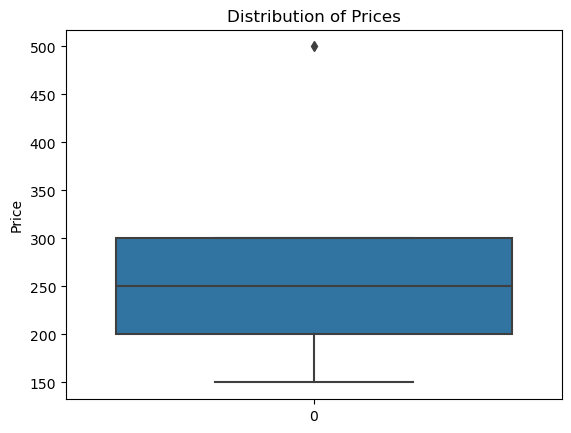

In [53]:
sns.boxplot(df['price'])
plt.ylabel('Price')
plt.title('Distribution of Prices')
plt.show()

In [54]:
lower_limit = 0
upper_limit = 550
df.loc[:, 'price'] = df['price'].apply(lambda x: min(max(x, lower_limit), upper_limit))

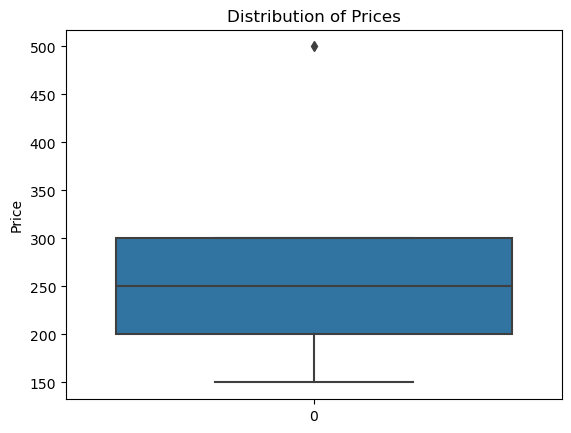

In [55]:
sns.boxplot(df['price'])
plt.ylabel('Price')
plt.title('Distribution of Prices')
plt.show()

In [56]:
import plotly.express as px
fig = px.scatter_mapbox(
    df,
    lat='latitude',
    lon='longitude',
    width=600,
    height=600,
    color='price',
    hover_data=["price"],)

fig.update_layout(mapbox_style="open-street-map")
fig.show()

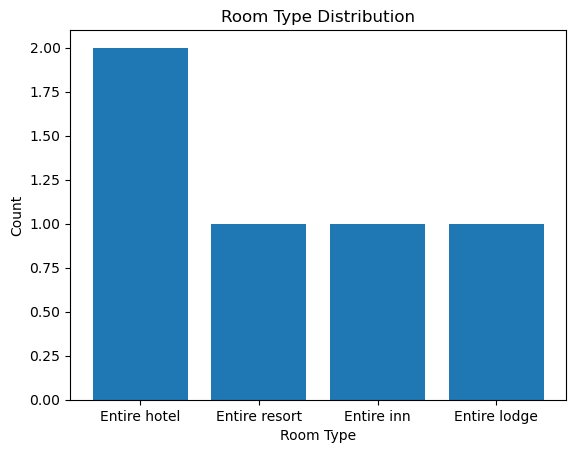

In [57]:
room_type_counts = df['room_type'].value_counts()
plt.bar(room_type_counts.index, room_type_counts.values)
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Room Type Distribution')
plt.show()

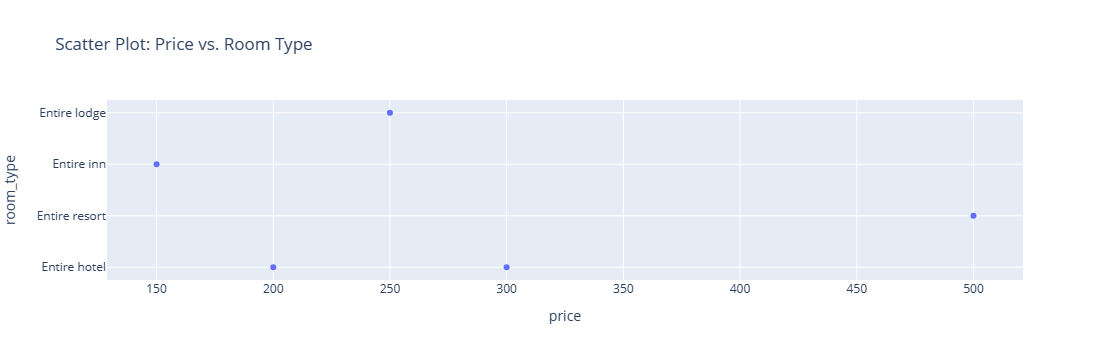

In [58]:
fig = px.scatter(df, x='price', y='room_type', title='Scatter Plot: Price vs. Room Type')
fig.show()

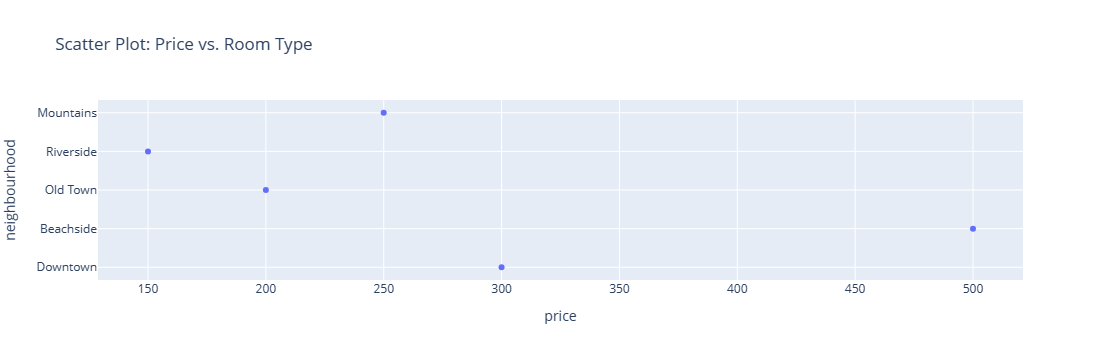

In [59]:
fig = px.scatter(df, x='price', y='neighbourhood', title='Scatter Plot: Price vs. Room Type')
fig.show()

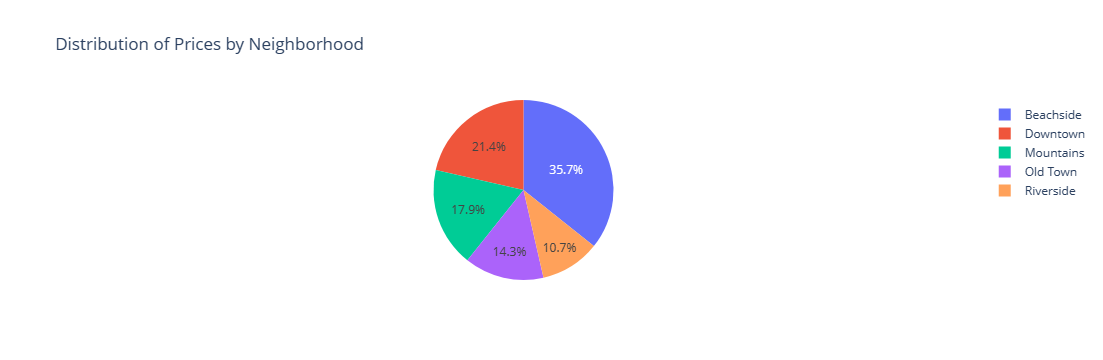

In [60]:
fig = px.pie(df, values='price', names='neighbourhood', title="Distribution of Prices by Neighborhood")
fig.show()

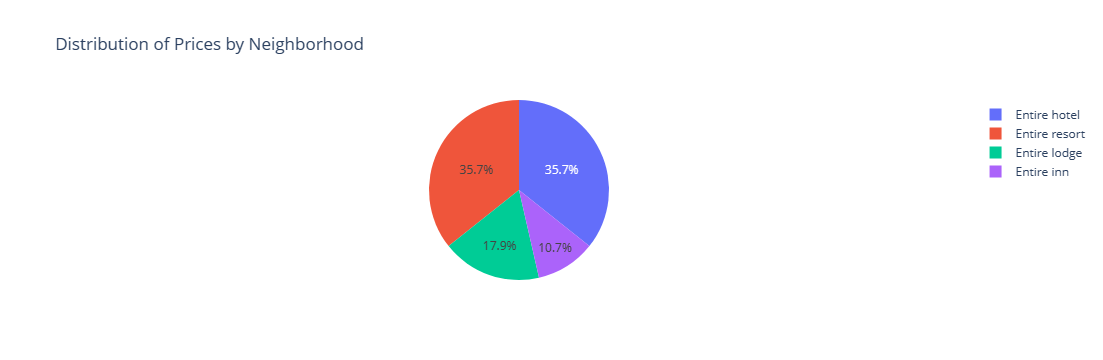

In [61]:
fig = px.pie(df, values='price', names='room_type', title="Distribution of Prices by Neighborhood")
fig.show()

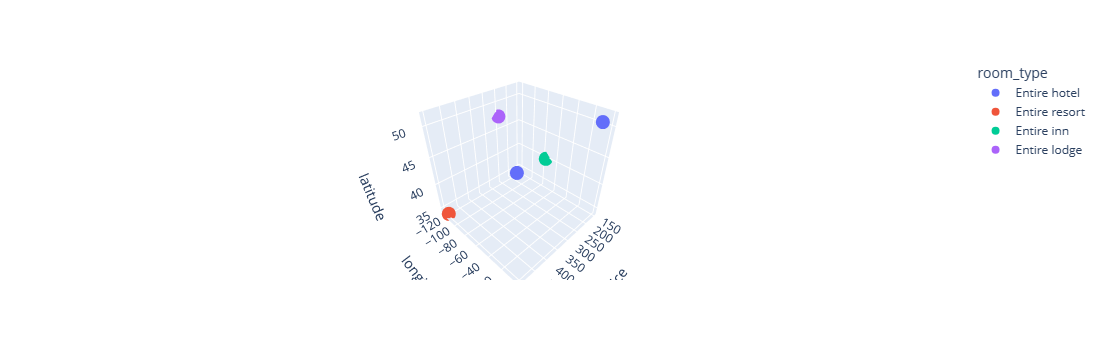

In [62]:
fig = px.scatter_3d(df, x='price', y='longitude', z='latitude',color='room_type')
fig.show()